# 导入模块

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn.preprocessing
import sklearn.cluster

# 读取数据

In [2]:
air_data_path = '../../Dataset/Air-Customer-Value-Analysis/air_data.csv'
air_data = pd.read_csv(air_data_path)
print(air_data.shape)

(62988, 44)


In [3]:
air_data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [67]:
air_data.dtypes

MEMBER_NO                    int64
FFP_DATE                    object
FIRST_FLIGHT_DATE           object
GENDER                      object
FFP_TIER                     int64
WORK_CITY                   object
WORK_PROVINCE               object
WORK_COUNTRY                object
AGE                        float64
LOAD_TIME                   object
FLIGHT_COUNT                 int64
BP_SUM                       int64
EP_SUM_YR_1                  int64
EP_SUM_YR_2                  int64
SUM_YR_1                   float64
SUM_YR_2                   float64
SEG_KM_SUM                   int64
WEIGHTED_SEG_KM            float64
LAST_FLIGHT_DATE            object
AVG_FLIGHT_COUNT           float64
AVG_BP_SUM                 float64
BEGIN_TO_FIRST               int64
LAST_TO_END                  int64
AVG_INTERVAL               float64
MAX_INTERVAL                 int64
ADD_POINTS_SUM_YR_1          int64
ADD_POINTS_SUM_YR_2          int64
EXCHANGE_COUNT               int64
avg_discount        

## 表述数据的基本统计信息

In [68]:
air_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


## 检查数据中是否有重复的会员 ID

In [69]:
dup = air_data[air_data['MEMBER_NO'].duplicated()]
if len(dup) != 0:
    print("There are duplication in the data:")
    print(dup)

## 统计数据集中缺失值情况

In [70]:
air_data.isnull().any()

MEMBER_NO                  False
FFP_DATE                   False
FIRST_FLIGHT_DATE          False
GENDER                      True
FFP_TIER                   False
WORK_CITY                   True
WORK_PROVINCE               True
WORK_COUNTRY                True
AGE                         True
LOAD_TIME                  False
FLIGHT_COUNT               False
BP_SUM                     False
EP_SUM_YR_1                False
EP_SUM_YR_2                False
SUM_YR_1                    True
SUM_YR_2                    True
SEG_KM_SUM                 False
WEIGHTED_SEG_KM            False
LAST_FLIGHT_DATE           False
AVG_FLIGHT_COUNT           False
AVG_BP_SUM                 False
BEGIN_TO_FIRST             False
LAST_TO_END                False
AVG_INTERVAL               False
MAX_INTERVAL               False
ADD_POINTS_SUM_YR_1        False
ADD_POINTS_SUM_YR_2        False
EXCHANGE_COUNT             False
avg_discount               False
P1Y_Flight_Count           False
L1Y_Flight

## 丢弃缺失值

In [71]:
boolean_filter = air_data['SUM_YR_1'].notnull() & air_data['SUM_YR_2'].notnull()
air_data = air_data[boolean_filter]

filter_1 = air_data['SUM_YR_1'] != 0
filter_2 = air_data['SUM_YR_2'] != 0
air_data = air_data[filter_1 | filter_2]

print(air_data.shape)

(62044, 44)


# 特征工程

## LRFMC模型

In [72]:
load_time = datetime.datetime.strptime('2014/03/31', '%Y/%m/%d')
ffp_dates = [datetime.datetime.strptime(ffp_date, '%Y/%m/%d') for ffp_date in air_data['FFP_DATE']]
length_of_relationship = [(load_time - ffp_date).days for ffp_date in ffp_dates]
air_data['LEN_REL'] = length_of_relationship

## 移除我们不关心的属性（列），即只保留LRFMC模型需要的属性

In [73]:
features = ['LEN_REL','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']
data = air_data[features]
features = ['L','F','C','M','R']
data.columns = features

In [74]:
print(data.head(5))
data.describe().T

      L    F         C       M   R
0  2706  210  0.961639  580717   1
1  2597  140  1.252314  293678   7
2  2615  135  1.254676  283712  11
3  2047   23  1.090870  281336  97
4  1816  152  0.970658  309928   5


,count,mean,std,min,25%,50%,75%,max
L,62044.0,1488.691090,847.880920,365.000000,735.000000,1278.000000,2182.000000,3437.0
F,62044.0,11.971359,14.110619,2.000000,3.000000,7.000000,15.000000,213.0
C,62044.0,0.722180,0.184833,0.136017,0.613085,0.712162,0.809293,1.5
M,62044.0,17321.694749,21052.728111,368.000000,4874.000000,10200.000000,21522.500000,580717.0
R,62044.0,172.532703,181.526164,1.000000,29.000000,105.000000,260.000000,731.0


## 对特征进行标准化

In [75]:
ss = sklearn.preprocessing.StandardScaler(with_mean=True, with_std=True)#标准化
data = ss.fit_transform(data) #数据转换
data = pd.DataFrame(data, columns=features)

data_db = data.copy()

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
L,62044.0,1.246004e-16,1.000008,-1.325304,-0.888919,-0.248493,0.817703,2.297875
F,62044.0,5.863547e-17,1.000008,-0.706662,-0.635793,-0.352316,0.214637,14.246736
C,62044.0,3.957894e-16,1.000008,-3.171335,-0.590238,-0.054200,0.471308,4.208258
M,62044.0,-1.026121e-16,1.000008,-0.805303,-0.591268,-0.338282,0.199539,26.761370
R,62044.0,4.397660e-17,1.000008,-0.944955,-0.790706,-0.372030,0.481848,3.076536


# 模型训练

In [77]:
num_clusters = 5 #设置类别为5
km = sklearn.cluster.KMeans(n_clusters=num_clusters) #模型加载
km.fit(data) #模型训练

KMeans(n_clusters=5)

In [78]:
r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['counts']
r

,L,F,C,M,R,counts
0,-0.313072,-0.573910,-0.175467,-0.536725,1.687079,12111
1,1.160942,-0.086636,-0.156893,-0.094542,-0.377438,15730
2,-0.700300,-0.160646,-0.258160,-0.160351,-0.415099,24611
3,0.040817,-0.232314,2.169323,-0.236670,-0.002402,4255
4,0.483552,2.483155,0.309787,2.424257,-0.799413,5337


In [79]:
km.labels_

array([4, 4, 4, ..., 2, 0, 0])

## 使用RFM列训练

In [80]:
data_rfm = data[['R','F','M']]
data_rfm.head(5)

,R,F,M
0,-0.944955,14.034129,26.761370
1,-0.911902,9.073286,13.126970
2,-0.889866,8.718940,12.653583
3,-0.416102,0.781591,12.540723
4,-0.922920,9.923716,13.898848


In [81]:
km.fit(data_rfm) #模型对只包含rfm数据集训练

KMeans(n_clusters=5)

In [82]:
km.labels_

array([4, 4, 4, ..., 0, 2, 0])

In [83]:
r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
rr = pd.concat([r2, r1], axis=1)
rr = pd.DataFrame(ss.fit_transform(rr) )
rr.columns = list(data_rfm.columns) + ['counts']
rr

,R,F,M,counts
0,-0.127524,-0.845528,-0.842447,1.712027
1,-0.625565,0.378882,0.338451,-0.788703
2,1.958245,-0.917176,-0.893512,0.114274
3,-0.477112,-0.390411,-0.396886,0.150359
4,-0.728044,1.774232,1.794395,-1.187958


# 分析与决策

In [84]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    
    # 计算得到evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # 使用1条线段连接指定点
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # 旋转绘图，使第一个轴位于顶部
            self.set_theta_zero_location('N')
        
        def fill(self, *args, closed=True, **kwargs):
            """覆盖填充，以便默认情况下关闭该行"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """覆盖填充，以便默认情况下关闭该行"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: x[0], y[0] 处的标记加倍
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)
        
        def _gen_axes_patch(self):
            # 轴必须以（0.5，0.5）为中心并且半径为0.5
            # 在轴坐标中。
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
        
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type 必须是'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon 给出以1为中心的半径为1的多边形
                #（0，0），但我们希望以（0.5，
                #   0.5）的坐标轴。
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# LCRFM模型作图

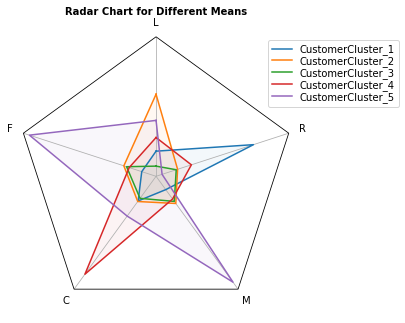

In [85]:
N = num_clusters
theta = radar_factory(N, frame='polygon')

data = r.to_numpy()

fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

# 去掉最后一列
case_data = data[:, :-1]
# 设置纵坐标不可见
ax.get_yaxis().set_visible(False)
# 图片标题
title = "Radar Chart for Different Means"
ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
             horizontalalignment='center', verticalalignment='center')
for d in case_data:
    # 画边
    ax.plot(theta, d)
    # 填充颜色
    ax.fill(theta, d, alpha=0.05)
# 设置纵坐标名称
ax.set_varlabels(features)

# 添加图例
labels = ["CustomerCluster_" + str(i) for i in range(1,6)]
legend = ax.legend(labels, loc=(0.9, .75), labelspacing=0.1)

plt.show()

# RFM模型作图

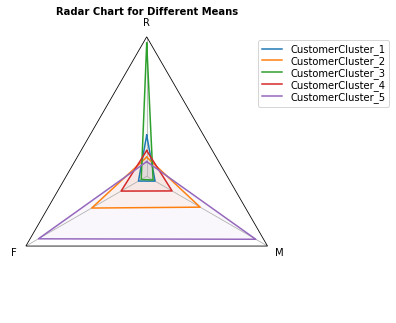

In [86]:
theta = radar_factory(3, frame='polygon')

data = rr.to_numpy()

fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

# 去掉最后一列
case_data = data[:, :-1]
# 设置纵坐标不可见
ax.get_yaxis().set_visible(False)
# 图片标题
title = "Radar Chart for Different Means"
ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
             horizontalalignment='center', verticalalignment='center')
for d in case_data:
    # 画边
    ax.plot(theta, d)
    # 填充颜色
    ax.fill(theta, d, alpha=0.05)
# 设置纵坐标名称
ax.set_varlabels(['R','F','M'])

# 添加图例
labels = ["CustomerCluster_" + str(i) for i in range(1,6)]
legend = ax.legend(labels, loc=(0.9, .75), labelspacing=0.1)

plt.show()

# DBSCAN模型对LCRFM特征进行计算

In [87]:
from sklearn.cluster import DBSCAN
# db = DBSCAN(eps=10,min_samples=2).fit(data_db)

# Kagging debug
db = DBSCAN(eps=10,min_samples=2).fit(data_db.sample(10000))

DBSCAN_labels = db.labels_

In [88]:
DBSCAN_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)